In [1]:
######################## PetFinder Malaysia Modeling ##############################

#author: Zoë Kimpel
#date: 4.25.19

#libraries
import sys
import collections
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import squareform
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn import tree
import collections
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

plt.style.use('bmh')
%matplotlib inline

In [2]:
#import the dataset

pet = pd.read_csv('train_features_w_state_info.csv', sep = ',')

pet.describe()

,Type,Age,Age_Yr,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,VideoAmt,PhotoAmt,AdoptionSpeed,Population,TotalArea(km2),HDI,Population_Density,2017GDPpercapita_USD,2017GDPpercapita_RM
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,...,14993.000000,14993.000000,14993.000000,14993.000000,1.499300e+04,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457547,10.452078,0.651637,265.287267,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,...,41346.028347,0.056760,3.889215,2.516441,4.212681e+06,6726.458747,0.814669,2395.926644,15818.693991,62912.072634
std,0.498211,18.155790,1.558780,60.024977,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,...,32.444153,0.346185,3.487810,1.177265,1.991900e+06,6973.628714,0.013912,2878.851275,7254.001448,28848.942564
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,41324.000000,0.000000,0.000000,0.000000,9.680000e+04,91.000000,0.674000,21.181197,3417.000000,13593.000000
25%,1.000000,2.000000,0.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,41326.000000,0.000000,2.000000,2.000000,1.768000e+06,243.000000,0.819000,724.839585,12092.000000,48091.000000
50%,1.000000,3.000000,0.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,...,41326.000000,0.000000,3.000000,2.000000,5.874100e+06,8104.000000,0.819000,724.839585,12092.000000,48091.000000
75%,2.000000,12.000000,1.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,...,41401.000000,0.000000,5.000000,4.000000,5.874100e+06,8104.000000,0.822000,7275.720165,27991.000000,111321.000000
max,2.000000,255.000000,21.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,...,41415.000000,8.000000,30.000000,4.000000,5.874100e+06,124450.000000,0.822000,7275.720165,27991.000000,111321.000000


In [3]:
#check for missing
#% of columns that are NA
columns = pet.columns
percent_missing = pet.isnull().sum() * 100 / len(pet)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

#name is missing - remove column from final training set

,column_name,percent_missing
Type,Type,0.000000
Sterilized,Sterilized,0.000000
Sterilized_Name,Sterilized_Name,0.000000
Health,Health,0.000000
Health_Name,Health_Name,0.000000
Quantity,Quantity,0.000000
Fee,Fee,0.000000
State,State,0.000000
State_Label,State_Label,0.000000
RescuerID,RescuerID,0.000000


In [14]:
train_image_data_pt1 = pd.read_csv('train_image.csv')
train_image_data_pt1['PetID'] = train_image_data_pt1['image'].apply(lambda x: x.split('-')[0])
train_image_data_pt1.head()

,image,dullness_whiteness,dullness,whiteness,average_pixel_width,image_size,temp_size,width,height,blurrness,colorfulness,PetID
0,0008c5398-1.jpg,"(5.285, 0.0)",5.285,0.0,0.0,23966,"(349, 479)",349,479,245.576187,152.711515,0008c5398
1,000a290e4-1.jpg,"(0.0, 0.0)",0.000,0.0,0.0,40076,"(360, 480)",360,480,1628.075039,63.306308,000a290e4
2,000fb9572-1.jpg,"(28.18, 0.0)",28.180,0.0,0.0,17985,"(400, 268)",400,268,462.087709,87.689116,000fb9572
3,0011d7c25-1.jpg,"(45.615, 0.0)",45.615,0.0,0.0,22383,"(299, 400)",299,400,760.934114,157.047352,0011d7c25
4,00156db4a-1.jpg,"(2.385, 0.0)",2.385,0.0,0.0,13293,"(400, 267)",400,267,275.050063,114.374175,00156db4a


In [16]:
train_image_data_pt2 = pd.read_csv('train_img_features.csv')
train_image_data_pt2.head()

,PetID,img_feature_0,img_feature_1,img_feature_2,img_feature_3,img_feature_4,img_feature_5,img_feature_6,img_feature_7,img_feature_8,...,img_feature_246,img_feature_247,img_feature_248,img_feature_249,img_feature_250,img_feature_251,img_feature_252,img_feature_253,img_feature_254,img_feature_255
0,86e1089a3,0.002000,0.167800,0.019715,0.015896,0.068162,0.002216,0.005042,0.004828,0.050760,...,0.787699,0.176626,0.575706,1.088629,0.439556,0.520460,1.547071,0.832572,0.599094,0.763348
1,6296e909a,0.002858,0.107450,0.019916,0.023482,0.174765,0.002297,0.005031,0.006338,0.083378,...,0.628259,0.686865,0.564000,0.968190,1.070276,1.545741,0.894410,0.838596,0.468237,0.916672
2,3422e4906,0.002734,0.072015,0.024455,0.018021,0.154207,0.001946,0.004211,0.001576,0.100046,...,0.579115,0.557625,1.131405,0.720513,1.496670,0.870955,1.289682,1.184461,0.465113,0.892827
3,5842f1ff5,0.002106,0.274519,0.054815,0.013727,0.089969,0.001650,0.005506,0.004295,0.118727,...,1.295853,0.326144,0.291669,1.608087,1.119176,1.470888,0.591445,0.832754,0.483021,1.134127
4,850a43f90,0.002185,0.174022,0.044818,0.016244,0.169775,0.002075,0.004421,0.004157,0.099671,...,1.092663,0.669894,0.395784,0.886075,1.219730,1.033965,1.065686,0.304054,0.438069,0.676818


In [28]:
train_image_data = pd.merge(train_image_data_pt1, train_image_data_pt2, on = 'PetID', how = 'right')

In [29]:
print(train_image_data_pt1.shape)
print(train_image_data_pt2.shape)
print(train_image_data.shape)

(14652, 12)
(14993, 257)
(14993, 268)


In [20]:
#train_image_data['PetID'] = train_image_data['image'].apply(lambda x: x.split('-')[0])

In [30]:
pet = pd.merge(left = pet, right = train_image_data, how = 'left', on = 'PetID')

In [31]:
pet.head()

,Type,Type_Name,Name,Age,Age_Yr,Breed1,Breed1_Name,Breed2,Breed2_Name,Gender,...,img_feature_246,img_feature_247,img_feature_248,img_feature_249,img_feature_250,img_feature_251,img_feature_252,img_feature_253,img_feature_254,img_feature_255
0,2,Cat,Nibble,3,0,299,Tabby,0,0,1,...,0.787699,0.176626,0.575706,1.088629,0.439556,0.520460,1.547071,0.832572,0.599094,0.763348
1,2,Cat,No Name Yet,1,0,265,Domestic Medium Hair,0,0,1,...,0.628259,0.686865,0.564000,0.968190,1.070276,1.545741,0.894410,0.838596,0.468237,0.916672
2,1,Dog,Brisco,1,0,307,Mixed Breed,0,0,1,...,0.579115,0.557625,1.131405,0.720513,1.496670,0.870955,1.289682,1.184461,0.465113,0.892827
3,1,Dog,Miko,4,0,307,Mixed Breed,0,0,2,...,1.295853,0.326144,0.291669,1.608087,1.119176,1.470888,0.591445,0.832754,0.483021,1.134127
4,1,Dog,Hunter,1,0,307,Mixed Breed,0,0,1,...,1.092663,0.669894,0.395784,0.886075,1.219730,1.033965,1.065686,0.304054,0.438069,0.676818


In [68]:
def has_name(x):
    if x == x:
        y = 0
    else:
        y = 1
    return y
pet['has_name'] = pet['Name'].apply(lambda x: has_name(x)).value_counts()

In [102]:
X_features = ['Type', 'Sterilized', 'Health', 'Fee', 'VideoAmt', 'PhotoAmt','Population',
             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'dullness', 'whiteness', 'blurrness', 'image_size',
             'width', 'height', 'colorfulness', 'State_Label', 'Health_Name', 'StateorTerritory','has_name', 'Quantity']
remove_cols = []
for cols in pet.columns.tolist():
    if 'img_feature_' not in cols:
        if cols not in X_features:
            remove_cols.append(cols)
remove_cols

['Type_Name',
 'Name',
 'Age_Yr',
 'Breed1_Name',
 'Breed2_Name',
 'Gender_Name',
 'Color1_Name',
 'Color2_Name',
 'Color3_Name',
 'MaturitySize_Name',
 'FurLength_Name',
 'Vaccinated_Name',
 'Dewormed_Name',
 'Sterilized_Name',
 'State',
 'RescuerID',
 'Description',
 'PetID',
 'AdoptionSpeed',
 'Region',
 '2017GDPpercapita_RM',
 'image',
 'dullness_whiteness',
 'average_pixel_width',
 'temp_size']

In [103]:
pet[remove_cols].head(1).iloc[:,0:15]

,Type_Name,Name,Age_Yr,Breed1_Name,Breed2_Name,Gender_Name,Color1_Name,Color2_Name,Color3_Name,MaturitySize_Name,FurLength_Name,Vaccinated_Name,Dewormed_Name,Sterilized_Name,State
0,Cat,Nibble,0,Tabby,0,Male,Black,White,0,Small,Short,No,No,No,41326


In [104]:
pet[remove_cols].head(1).iloc[:,15:]

,RescuerID,Description,PetID,AdoptionSpeed,Region,2017GDPpercapita_RM,image,dullness_whiteness,average_pixel_width,temp_size
0,8480853f516546f6cf33aa88cd76c379,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,2,West_Malaysia,48091,86e1089a3-1.jpg,"(21.955000000000002, 1.035)",0.0,"(360, 480)"


In [105]:
pet[X_features].head(1).iloc[:,0:15]

,Type,Sterilized,Health,Fee,VideoAmt,PhotoAmt,Population,TotalArea(km2),HDI,Population_Density,Dewormed,2017GDPpercapita_USD,Vaccinated,Age,Breed1
0,2,2,1,100,0,1,5874100,8104,0.819,724.839585,2,12092,2,3,299


In [106]:
pet[X_features].head(1).iloc[:,15:]

,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,dullness,whiteness,blurrness,image_size,width,height,colorfulness,State_Label,Health_Name,StateorTerritory,has_name,Quantity
0,0,1,1,7,0,1,1,21.955,1.035,672.771047,24638.0,360.0,480.0,180.252821,Selangor,Healthy,State,13736.0,1


In [107]:
remove_cols

['Type_Name',
 'Name',
 'Age_Yr',
 'Breed1_Name',
 'Breed2_Name',
 'Gender_Name',
 'Color1_Name',
 'Color2_Name',
 'Color3_Name',
 'MaturitySize_Name',
 'FurLength_Name',
 'Vaccinated_Name',
 'Dewormed_Name',
 'Sterilized_Name',
 'State',
 'RescuerID',
 'Description',
 'PetID',
 'AdoptionSpeed',
 'Region',
 '2017GDPpercapita_RM',
 'image',
 'dullness_whiteness',
 'average_pixel_width',
 'temp_size']

In [108]:
pet2 = pet.drop(remove_cols, axis = 1)

In [109]:
pet2.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,img_feature_247,img_feature_248,img_feature_249,img_feature_250,img_feature_251,img_feature_252,img_feature_253,img_feature_254,img_feature_255,has_name
0,2,3,299,0,1,1,7,0,1,1,...,0.176626,0.575706,1.088629,0.439556,0.520460,1.547071,0.832572,0.599094,0.763348,13736.0
1,2,1,265,0,1,1,2,0,2,2,...,0.686865,0.564000,0.968190,1.070276,1.545741,0.894410,0.838596,0.468237,0.916672,1257.0
2,1,1,307,0,1,2,7,0,2,2,...,0.557625,1.131405,0.720513,1.496670,0.870955,1.289682,1.184461,0.465113,0.892827,NaN
3,1,4,307,0,2,1,2,0,2,1,...,0.326144,0.291669,1.608087,1.119176,1.470888,0.591445,0.832754,0.483021,1.134127,NaN
4,1,1,307,0,1,1,0,0,2,1,...,0.669894,0.395784,0.886075,1.219730,1.033965,1.065686,0.304054,0.438069,0.676818,NaN


In [118]:
pet3 = pd.concat([pet2, pd.get_dummies(pet2[['Health_Name', 'State_Label', 'StateorTerritory']])], axis=1)
pet3 = pet3.drop(['Health_Name', 'State_Label', 'StateorTerritory'], axis = 1)
pet3.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,State_Label_Negeri Sembilan,State_Label_Pahang,State_Label_Perak,State_Label_Pulau Pinang,State_Label_Sabah,State_Label_Sarawak,State_Label_Selangor,State_Label_Terengganu,StateorTerritory_State,StateorTerritory_Territory
0,2,3,299,0,1,1,7,0,1,1,...,0,0,0,0,0,0,1,0,1,0
1,2,1,265,0,1,1,2,0,2,2,...,0,0,0,0,0,0,0,0,0,1
2,1,1,307,0,1,2,7,0,2,2,...,0,0,0,0,0,0,1,0,1,0
3,1,4,307,0,2,1,2,0,2,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,307,0,1,1,0,0,2,1,...,0,0,0,0,0,0,1,0,1,0


In [119]:
###################### Modeling ######################

#dataprep

#split into X & Y
#X_features = ['Type', 'Sterilized', 'Health', 'Fee', 'VideoAmt', 'PhotoAmt','Population',
#             'TotalArea(km2)','HDI', 'Population_Density', 'Dewormed', '2017GDPpercapita_USD', 'Vaccinated', 'Age', 'Breed1', 'Breed2',
#             'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'dullness', 'whiteness', 'blurrness', 'image_size',
#             'width', 'height', 'colorfulness']
#X = pet[X_features]
#X = pet[~remove_cols]
X = pet3
X.replace(' ', '')
Y = pet['AdoptionSpeed']
Y = Y.astype('int')

#split data into test and train
validation_size = .2
random_seed = 1234

X.fillna(0, inplace=True)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = random_seed)


In [120]:
X.dtypes

Type                             int64
Age                              int64
Breed1                           int64
Breed2                           int64
Gender                           int64
Color1                           int64
Color2                           int64
Color3                           int64
MaturitySize                     int64
FurLength                        int64
Vaccinated                       int64
Dewormed                         int64
Sterilized                       int64
Health                           int64
Quantity                         int64
Fee                              int64
VideoAmt                         int64
PhotoAmt                         int64
Population                       int64
TotalArea(km2)                   int64
HDI                            float64
Population_Density             float64
2017GDPpercapita_USD             int64
dullness                       float64
whiteness                      float64
image_size               

In [121]:
def Cmatrix(rater_a, rater_b, min_rating=None, max_rating=None):
    """
    Returns the confusion matrix between rater's ratings
    """
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(rater_a + rater_b)
    if max_rating is None:
        max_rating = max(rater_a + rater_b)
    num_ratings = int(max_rating - min_rating + 1)
    conf_mat = [[0 for i in range(num_ratings)]
                for j in range(num_ratings)]
    for a, b in zip(rater_a, rater_b):
        conf_mat[a - min_rating][b - min_rating] += 1
    return conf_mat

def histogram(ratings, min_rating=None, max_rating=None):
    """
    Returns the counts of each type of rating that a rater made
    """
    if min_rating is None:
        min_rating = min(ratings)
    if max_rating is None:
        max_rating = max(ratings)
    num_ratings = int(max_rating - min_rating + 1)
    hist_ratings = [0 for x in range(num_ratings)]
    for r in ratings:
        hist_ratings[r - min_rating] += 1
    return hist_ratings

def quadratic_weighted_kappa(y, y_pred):
    """
    Calculates the quadratic weighted kappa
    axquadratic_weighted_kappa calculates the quadratic weighted kappa
    value, which is a measure of inter-rater agreement between two raters
    that provide discrete numeric ratings.  Potential values range from -1
    (representing complete disagreement) to 1 (representing complete
    agreement).  A kappa value of 0 is expected if all agreement is due to
    chance.
    quadratic_weighted_kappa(rater_a, rater_b), where rater_a and rater_b
    each correspond to a list of integer ratings.  These lists must have the
    same length.
    The ratings should be integers, and it is assumed that they contain
    the complete range of possible ratings.
    quadratic_weighted_kappa(X, min_rating, max_rating), where min_rating
    is the minimum possible rating, and max_rating is the maximum possible
    rating
    """
    rater_a = y
    rater_b = y_pred
    min_rating=None
    max_rating=None
    rater_a = np.array(rater_a, dtype=int)
    rater_b = np.array(rater_b, dtype=int)
    assert(len(rater_a) == len(rater_b))
    if min_rating is None:
        min_rating = min(min(rater_a), min(rater_b))
    if max_rating is None:
        max_rating = max(max(rater_a), max(rater_b))
    conf_mat = Cmatrix(rater_a, rater_b,
                                min_rating, max_rating)
    num_ratings = len(conf_mat)
    num_scored_items = float(len(rater_a))

    hist_rater_a = histogram(rater_a, min_rating, max_rating)
    hist_rater_b = histogram(rater_b, min_rating, max_rating)

    numerator = 0.0
    denominator = 0.0

    for i in range(num_ratings):
        for j in range(num_ratings):
            expected_count = (hist_rater_a[i] * hist_rater_b[j]
                              / num_scored_items)
            d = pow(i - j, 2.0) / pow(num_ratings - 1, 2.0)
            numerator += d * conf_mat[i][j] / num_scored_items
            denominator += d * expected_count / num_scored_items

    return (1.0 - numerator / denominator)

In [26]:
def kfold_cross_validation(X,y, col_names):
    #ten cross-validation employed here

    #shuffling the data
    #np.random.seed(RANDOM_SEED)

    # specify the k-fold cross-validation design
    N_FOLDS = 10
    
    random_seed = 1234
    
    # set up numpy array for storing results
    cv_results = np.zeros((N_FOLDS, len(names)))

    kf = model_selection.KFold(n_splits = N_FOLDS, random_state = random_seed)

    index_for_fold = 0 #fold count initialized

    for train_index, test_index in kf.split(X,y):
        print('\nFold index:', index_for_fold + 1,
             '------------------------------------------')
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

        print('\nShape of input data for this fold:',
              '\nData Set: (Observations, Variables)')
        print('X_train:', X_train.shape)
        print('X_test:',X_test.shape)
        print('y_train:', y_train.shape)
        print('y_test:',y_test.shape)

        index_for_method = 0 #initialize
        for name, reg_model in zip(names, models):
            print('\nRegression model evaluation for:', name)
            print(' Scikit Learn method:', reg_model)
            reg_model.fit(X_train, y_train) #fit on the train set for this fold

            #evaluate on the test set for this fold
            y_test_predict = reg_model.predict(X_test)

            fold_method_result = quadratic_weighted_kappa(y_test, y_test_predict)

            cv_results[index_for_fold, index_for_method] = fold_method_result
            index_for_method += 1

        
        cv_results_df = pd.DataFrame(cv_results)
        cv_results_df.columns = col_names
        index_for_fold += 1
    return cv_results_df

In [27]:
col_names = ['LR','CART','NB']
models = [LogisticRegression(), DecisionTreeClassifier(), GaussianNB()]

In [30]:
chcek = kfold_cross_validation(X, Y, col_names)



NameError: name 'names' is not defined

In [86]:
chcek

,LR,CART,NB
0,0.077971,0.179505,0.119270
1,0.071066,0.181329,0.107086
2,0.051475,0.188155,0.073351
3,0.082152,0.227347,0.107023
4,0.066008,0.186005,0.124935
5,0.089862,0.204935,0.128092
6,0.075563,0.226725,0.106493
7,0.062801,0.216296,0.076095
8,0.071520,0.214077,0.069687
9,0.091930,0.173524,0.152589


In [31]:
# 3 basic models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = random_seed) #10 fold cross validation
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = ("Model:", name, cv_results.mean())
    print(msg)

c:\users\sadeeb\anaconda3\envs\testing\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sadeeb\anaconda3\envs\testing\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\sadeeb\anaconda3\envs\testing\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sadeeb\anaconda3\envs\testing\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\sadeeb\anaconda3\envs\testing\lib\site-pa

('Model:', 'LR', 0.2998999860995274)
('Model:', 'CART', 0.31716159299416186)
('Model:', 'NB', 0.3010678343063664)


In [33]:
# looking at Decision Tree Classifier
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predictions_DT = DT.predict(x_test)
print("done")


#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test, predictions_DT))
print("Confusion Matrix", "\n",  confusion_matrix(y_test, predictions_DT))
print("Classification Report", "\n", classification_report(y_test, predictions_DT))

done
Accuracy Score 
 0.3177725908636212
Confusion Matrix 
 [[  4  31  21  14  11]
 [ 18 146 191 117 120]
 [ 28 185 244 169 180]
 [ 22 106 162 199 154]
 [ 18 129 200 170 360]]
Classification Report 
              precision    recall  f1-score   support

          0       0.04      0.05      0.05        81
          1       0.24      0.25      0.25       592
          2       0.30      0.30      0.30       806
          3       0.30      0.31      0.30       643
          4       0.44      0.41      0.42       877

avg / total       0.32      0.32      0.32      2999



In [122]:
#train the algorithm

RF = RandomForestClassifier(n_estimators = 100,
                                    max_features = 'log2',
                                    bootstrap = False,
                                    random_state = random_seed)
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)

#how accuracy is it?
print("Quadratic Weighted Kappa Score \n", quadratic_weighted_kappa(y_test, y_pred_RF))
print("Accuracy Score \n", accuracy_score(y_test, y_pred_RF))
print("Confusion Matrix", "\n",  confusion_matrix(y_test, y_pred_RF))
print("Classification Report", "\n", classification_report(y_test, y_pred_RF))

Quadratic Weighted Kappa Score 
 0.2983071329261201
Accuracy Score 
 0.3697899299766589
Confusion Matrix 
 [[  0  15  38   5  23]
 [  0 152 262  48 130]
 [  0 138 339  77 252]
 [  0  71 284  73 215]
 [  1  61 206  64 545]]
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.35      0.26      0.30       592
           2       0.30      0.42      0.35       806
           3       0.27      0.11      0.16       643
           4       0.47      0.62      0.53       877

   micro avg       0.37      0.37      0.37      2999
   macro avg       0.28      0.28      0.27      2999
weighted avg       0.34      0.37      0.34      2999



In [92]:
RF.feature_importances_

array([0.00843174, 0.02085785, 0.0056438 , 0.02119275, 0.00613967,
       0.06322647, 0.01398836, 0.01277793, 0.01255055, 0.01225558,
       0.02159726, 0.01200107, 0.01962364, 0.07390977, 0.04821526,
       0.03011971, 0.02770799, 0.04167429, 0.04418138, 0.02251695,
       0.02362116, 0.02579419, 0.07965021, 0.06370788, 0.09368109,
       0.09385753, 0.05124267, 0.04983323])

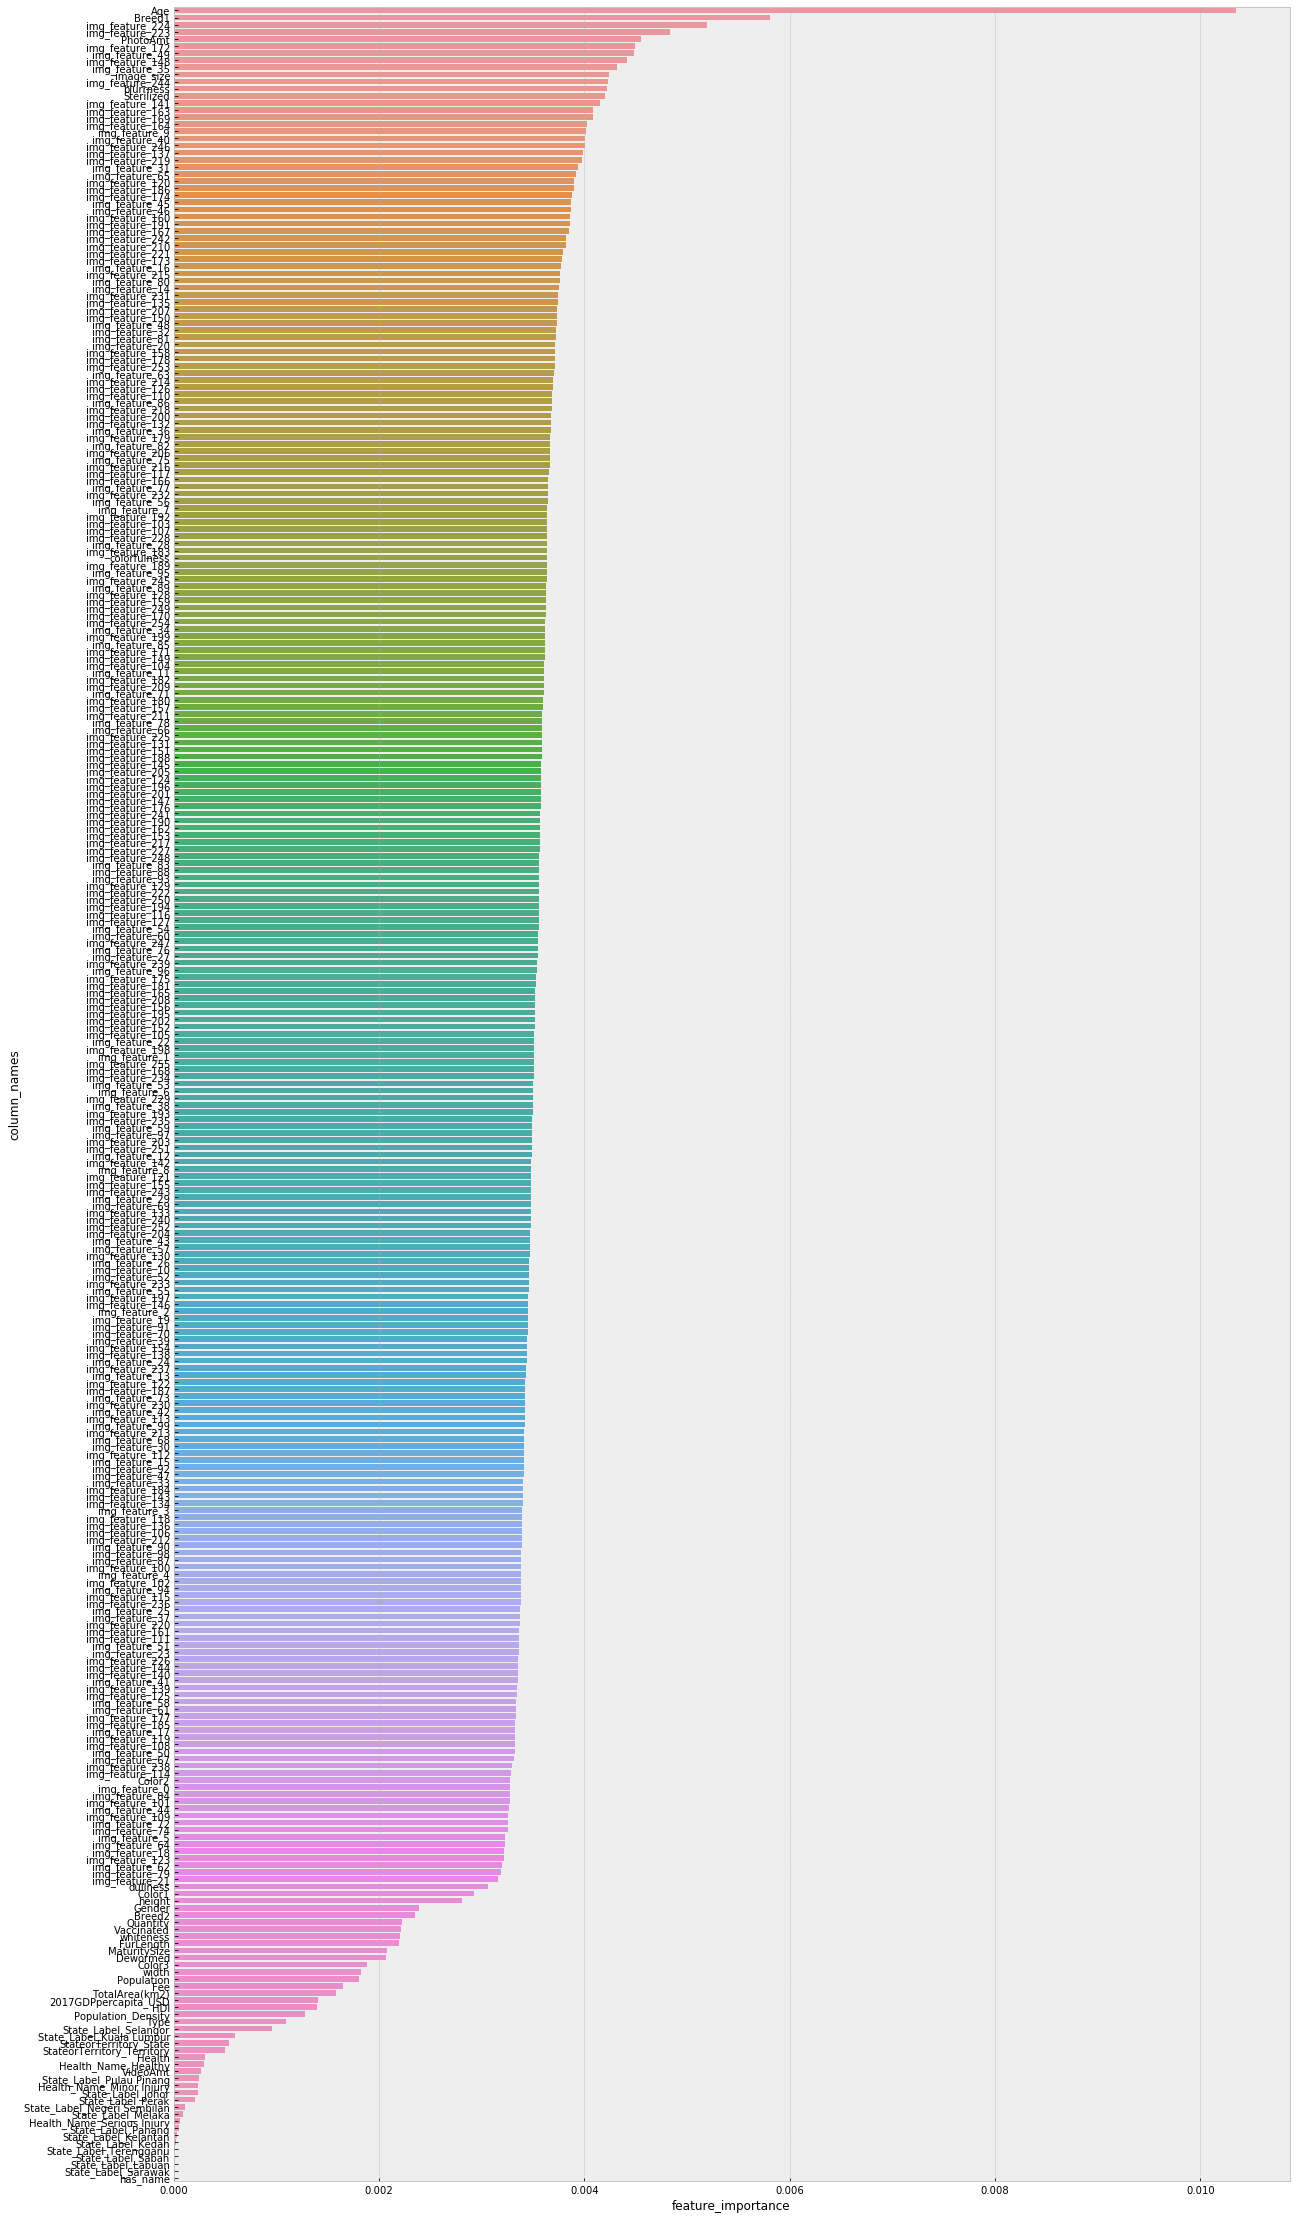

In [129]:
RF_feature_importance_df = pd.DataFrame({"column_names":x_train.columns, "feature_importance": RF.feature_importances_})
RF_feature_importance_df = RF_feature_importance_df.sort_values('feature_importance',ascending=False)
#xgb_feature_importance_filtered_df = RF_feature_importance_df.loc[RF_feature_importance_df.feature_importance>0.003].sort_values('feature_importance',ascending=False)
f, ax = plt.subplots(figsize=(20, 40))
sns.barplot(x="feature_importance", y="column_names", data=RF_feature_importance_df)

In [124]:
import xgboost as xgb

In [125]:
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

xgb_params = {'objective' : 'multi:softmax',
              'eval_metric' : 'mlogloss',
              'eta' : 0.05,
              'max_depth' : 4,
              'num_class' : 5,
              'lambda' : 0.8
}
#param = {'max_depth':4, 'eta':0.05, 'verbosity':1, 'objective':'multi:softmax','num_class' : 5, 'lambda':0.8, 'eval_metric' : 'mlogloss',}
num_round = 1000

print('Fitting XGBoost: ')
bst = xgb.train(xgb_params, 
                d_train, 
                num_round, 
                watchlist, 
                early_stopping_rounds=50, 
                verbose_eval=0)

c:\users\sadeeb\anaconda3\envs\testing\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Fitting XGBoost: 


In [126]:
y_pred_XGB = bst.predict(xgb.DMatrix(x_test)).astype(int)

In [127]:
quadratic_weighted_kappa(y_test, y_pred_XGB)

0.35136984948558314

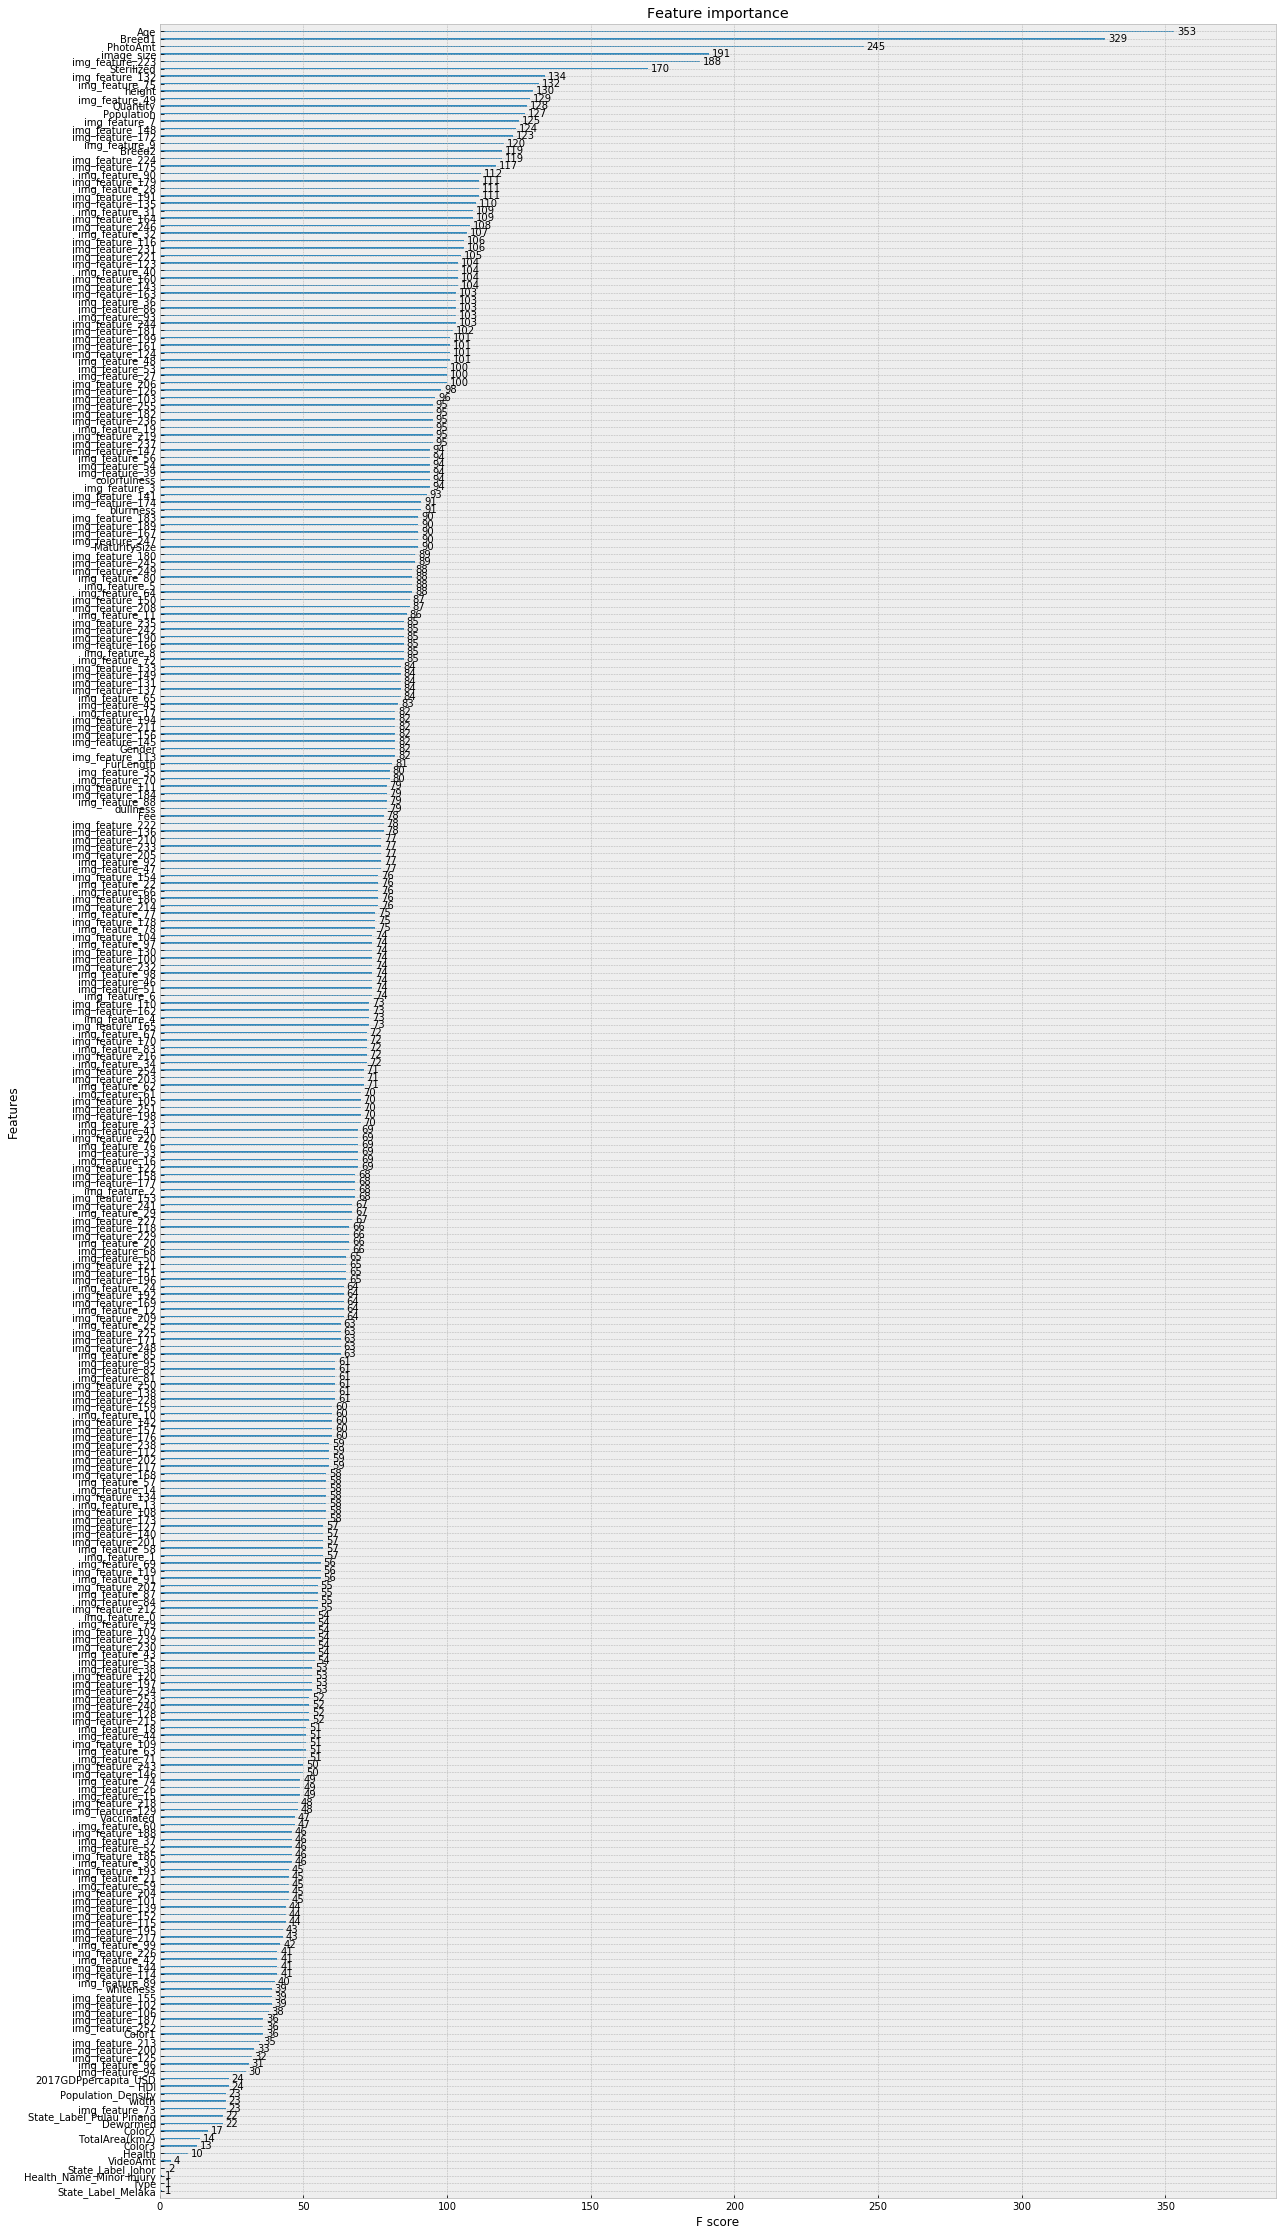

In [130]:
f, ax = plt.subplots(figsize=(20, 40))
xgb.plot_importance(bst, ax=ax)

In [34]:
#train the algorithm

RF = RandomForestClassifier(n_estimators = 100,
                                    max_features = 'log2',
                                    bootstrap = False,
                                    random_state = random_seed)
RF.fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)

#how accuracy is it?
print("Accuracy Score \n", accuracy_score(y_test, y_pred_RF))
print("Confusion Matrix", "\n",  confusion_matrix(y_test, y_pred_RF))
print("Classification Report", "\n", classification_report(y_test, y_pred_RF))

Accuracy Score 
 0.41547182394131377
Confusion Matrix 
 [[  1  25  21  10  24]
 [  4 207 199  71 111]
 [  0 191 301 127 187]
 [  2  91 182 181 187]
 [  1  75 156  89 556]]
Classification Report 
              precision    recall  f1-score   support

          0       0.12      0.01      0.02        81
          1       0.35      0.35      0.35       592
          2       0.35      0.37      0.36       806
          3       0.38      0.28      0.32       643
          4       0.52      0.63      0.57       877

avg / total       0.40      0.42      0.40      2999



In [35]:
#print the feature importances
print("Features sorted by their score:\n")
print(sorted(zip(map(lambda x: round(x, 4), RF.feature_importances_), X_features), reverse=True))

Features sorted by their score:

[(0.0939, 'image_size'), (0.0937, 'blurrness'), (0.0797, 'dullness'), (0.0739, 'Age'), (0.0637, 'whiteness'), (0.0632, 'PhotoAmt'), (0.0512, 'width'), (0.0498, 'height'), (0.0482, 'Breed1'), (0.0442, 'Color2'), (0.0417, 'Color1'), (0.0301, 'Breed2'), (0.0277, 'Gender'), (0.0258, 'FurLength'), (0.0236, 'MaturitySize'), (0.0225, 'Color3'), (0.0216, 'Dewormed'), (0.0212, 'Fee'), (0.0209, 'Sterilized'), (0.0196, 'Vaccinated'), (0.014, 'Population'), (0.0128, 'TotalArea(km2)'), (0.0126, 'HDI'), (0.0123, 'Population_Density'), (0.012, '2017GDPpercapita_USD'), (0.0084, 'Type'), (0.0061, 'VideoAmt'), (0.0056, 'Health')]


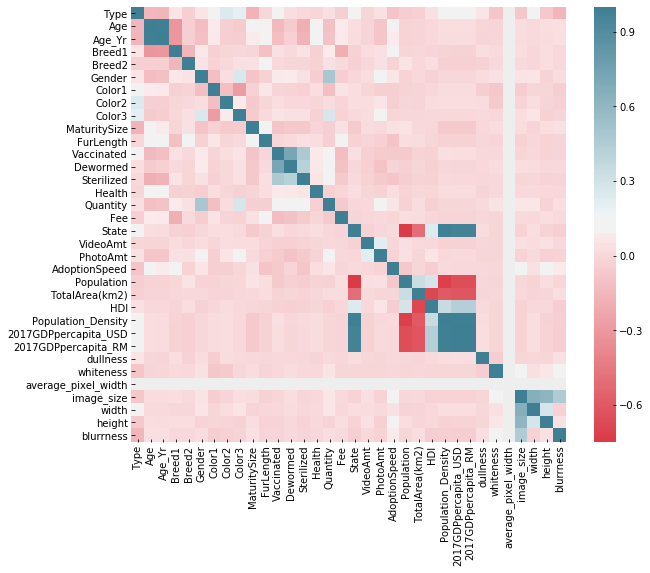

In [42]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = pet.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(10, 220, as_cmap=True),
            square=True, ax=ax)